# This script inteprets the ttest results

In this script, we will interpret the results of the ttest from the previous step. It requires the path to the folder of t-test results which will be imported and displayed depending on which plot is required.

In [1]:
# Imports
import interpret_ttest_results as result_interpret
import pandas as pd
import openai_api_test as openai
import ast

['Q96LR5', 'Q9UKB1', 'P56373', 'Q8NE63', 'O15392', 'Q8WTP8', 'Q9Y263', 'Q9Y4W6', 'Q9UL03', 'Q8NHQ9', 'Q8IZL2', 'Q8WCZ8', 'Q9Y3F4', 'P0C7X1', 'Q32MC0', 'Q5XK14', 'Q6VZH0', 'Q8N5Y2', 'Q9NUX5', 'O75558', 'P84107', 'Q9NVP1', 'Q92545', 'Q8NFP4', 'Q9P2K8', 'Q5U2V8', 'Q9P2E7', 'Q96NW7', 'Q6PGP0', 'Q8TE73', 'Q9UER7', 'P0C264', 'Q8TBC4', 'Q8TE78', 'Q0P6D6', 'Q9Y6X0', 'Q8IYU8', 'Q6N022', 'Q9NVI5', 'Q9NRM2', 'Q9BT06', 'Q9BXF3', 'A2PYH4', 'Q0VD83']


In [2]:
path = 'G:/My Drive/Data/data/eIF4F pilot/imputed/ttest results/'
path = 'G:/My Drive/Data/data/eIF4F pilot/imputed/normalized/ttest results/'

In [3]:
# scan folder for results
results_paths = result_interpret.scan_folder(path)

In [13]:
# curated list of 5'TOP proteins from Cockman et al. 2020 https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7407576/
'''mRNAs encoding proteins require for translation are distinguished by a 5’ Terminal OligoPyrimidine (5’ TOP) motif. 
The 5’ TOP motif begins with a m7G capped C nucleotide followed by a run of approximately 4-15 pyrimidines [9] often followed by a 
G-rich region [10,11] (Table A1). The 5’ TOP motif is highly conserved and is found in all 79 human ribosomal proteins as well as 
non-ribosomal proteins involved in translation including multiple subunits of eIF3, eIF4A, eEF2, and poly(A) binding protein (PABP) [12]. 
This shared TOP motif allows cells to quickly modulate the expression of proteins involved in ribosome production and protein 
synthesis in response to changes in cellular homeostasis.'''
pois = [
    'RPSA', 'RPS2', 'RPS3', 'RPS3A', 'RPS4X', 'RPS4Y', 'RPS5', 'RPS6', 'RPS7', 
    'RPS8', 'RPS9', 'RPS10', 'RPS11', 'RPS12', 'RPS13', 'RPS14', 'RPS15', 'RPS15A', 
    'RPS16', 'RPS17', 'RPS18', 'RPS19', 'RPS20', 'RPS21', 'RPS23', 'RPS24', 'RPS25', 
    'RPS26', 'RPS27', 'RPS27A', 'RPS28', 'RPS29', 'RPS30', 'RPP0', 'RPP1', 'RPP2', 
    'RPL3', 'RPL4', 'RPL5', 'RPL6', 'RPL7', 'RPL7A', 'RPL8', 'RPL9', 'RPL10', 'RPL11', 
    'RPL10A', 'RPL12', 'RPL13', 'RPL13A', 'RPL14', 'RPL15', 'RPL17', 'RPL18', 'RPL18A', 
    'RPL19', 'RPL21', 'RPL22', 'RPL23', 'RPL23A', 'RPL24', 'RPL26', 'RPL27', 'RPL27A', 
    'RPL30', 'RPL31', 'RPL32', 'RPL34', 'RPL35', 'RPL36', 'RPL36A', 'RPL37', 'RPL39', 
    'RPL40', 'RPL41', 'EIF3A', 'EIF3E', 'EIF3F', 'EIF3H', 'EIF4B', 'EEF1A', 'EEF1B2', 
    'EEF1D', 'EEF1G', 'EEF2', 'RACK1', 'PABP', 'HNRNPA1', 'NUCLEOPHOSMIN', 'NAP1L1', 
    'TCTP', 'VIMENTIN'
]
# ribosomal
pois = ['RPSA', 'RPS2', 'RPS3', 'RPS3A', 'RPS4X', 'RPS4Y', 'RPS5', 'RPS6', 'RPS7', 
    'RPS8', 'RPS9', 'RPS10', 'RPS11', 'RPS12', 'RPS13', 'RPS14', 'RPS15', 'RPS15A', 
    'RPS16', 'RPS17', 'RPS18', 'RPS19', 'RPS20', 'RPS21', 'RPS23', 'RPS24', 'RPS25', 
    'RPS26', 'RPS27', 'RPS27A', 'RPS28', 'RPS29', 'RPS30', 'RPP0', 'RPP1', 'RPP2', 
    'RPL3', 'RPL4', 'RPL5', 'RPL6', 'RPL7', 'RPL7A', 'RPL8', 'RPL9', 'RPL10', 'RPL11', 
    'RPL10A', 'RPL12', 'RPL13', 'RPL13A', 'RPL14', 'RPL15', 'RPL17', 'RPL18', 'RPL18A', 
    'RPL19', 'RPL21', 'RPL22', 'RPL23', 'RPL23A', 'RPL24', 'RPL26', 'RPL27', 'RPL27A', 
    'RPL30', 'RPL31', 'RPL32', 'RPL34', 'RPL35', 'RPL36', 'RPL36A', 'RPL37', 'RPL39', 
    'RPL40', 'RPL41']
# non ribosomal
#pois = ['EIF3A', 'EIF3E', 'EIF3F', 'EIF3H', 'EIF4B', 'EEF1A', 'EEF1B2','EEF1D', 'EEF1G', 'EEF2', 'RACK1', 'PABPC1', 'HNRNPA1', 'NPM1', 'NAP1L1','TCTP', 'VIM']

# other proteins of interest
# eIF containing proteins
#pois = ['EIF1', 'EIF2A', 'EIF2AK1', 'EIF2AK2', 'EIF2AK3', 'EIF2AK4', 'EIF2B1', 'EIF2B2', 'EIF2B3', 'EIF2B4', 'EIF2B5', 'EIF2C1', 'EIF2C2', 'EIF2C3', 'EIF2C4', 'EIF2S1', 'EIF2S2', 'EIF2S3', 'EIF3A', 'EIF3B', 'EIF3C', 'EIF3D', 'EIF3E', 'EIF3F', 'EIF3G', 'EIF3H', 'EIF3I', 'EIF3J', 'EIF3K', 'EIF3L', 'EIF3M', 'EIF4A1', 'EIF4A2', 'EIF4A3', 'EIF4B', 'EIF4E2', 'EIF4E3', 'EIF4EBP1', 'EIF4EBP2', 'EIF4EBP3', 'EIF4H', 'EIF5', 'EIF5A', 'EIF5A2', 'EIF5B', 'EIF6']
# knock downs
#pois = ['EIF4E','EIF4G1','EIF4G2','EIF4G3']
#pois = ['EIF4E2', 'EIF3D']

In [14]:
# get pois using chatgpt request (in development)
#question = "Give me a list of human RNA binding proteins"
#pois = openai.get_response(question)
                           

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

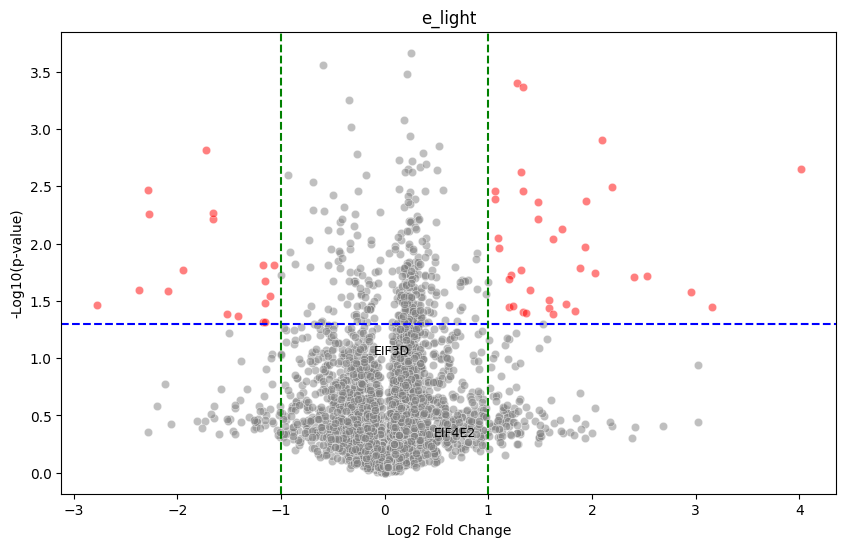

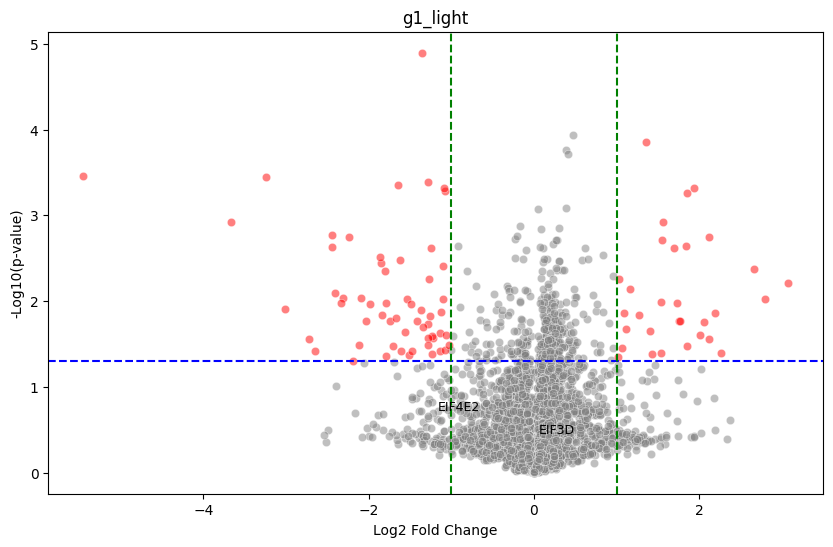

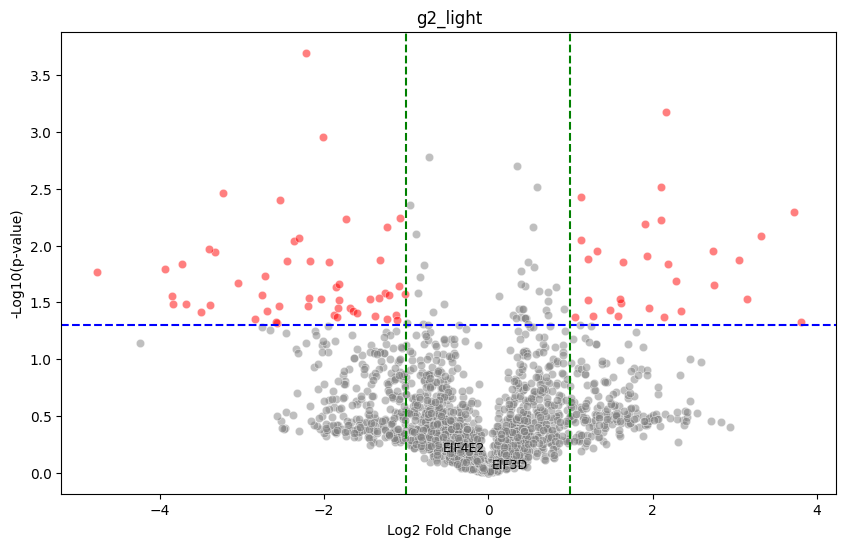

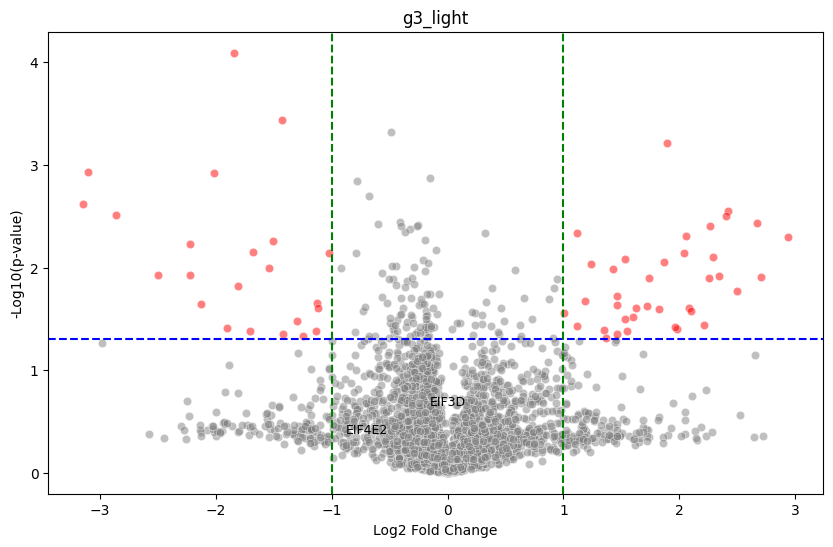

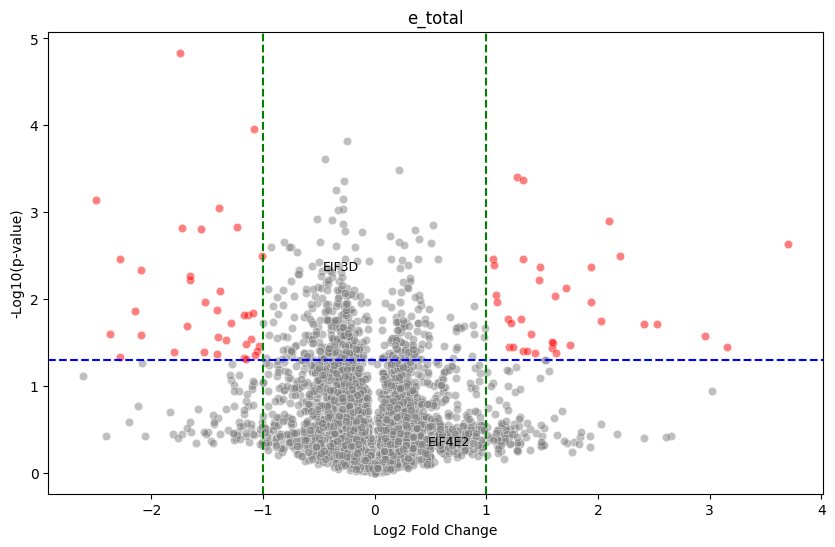

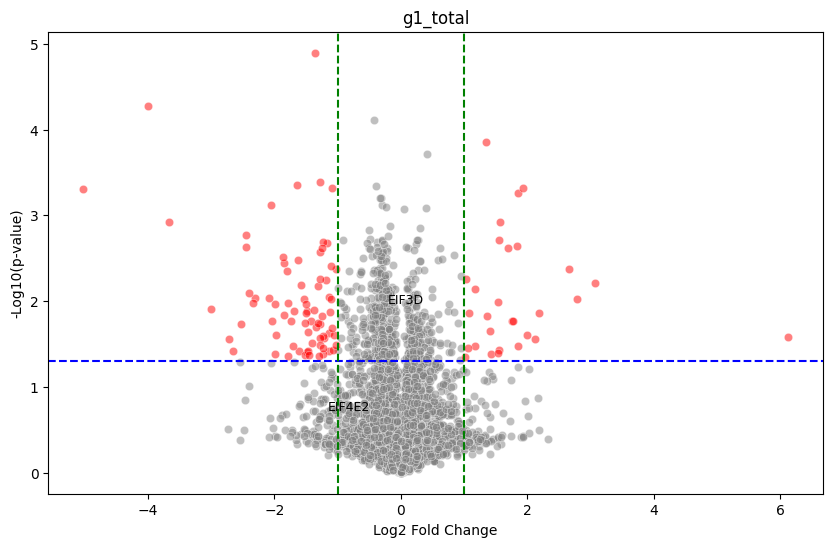

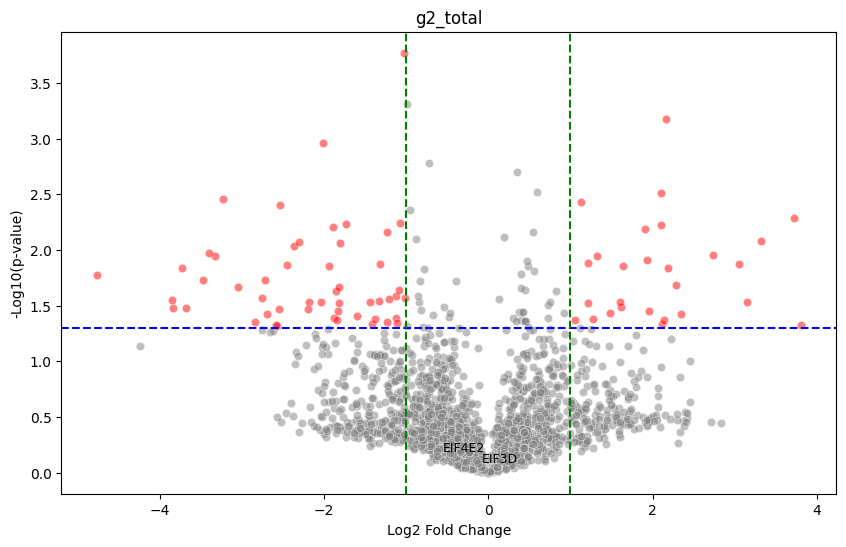

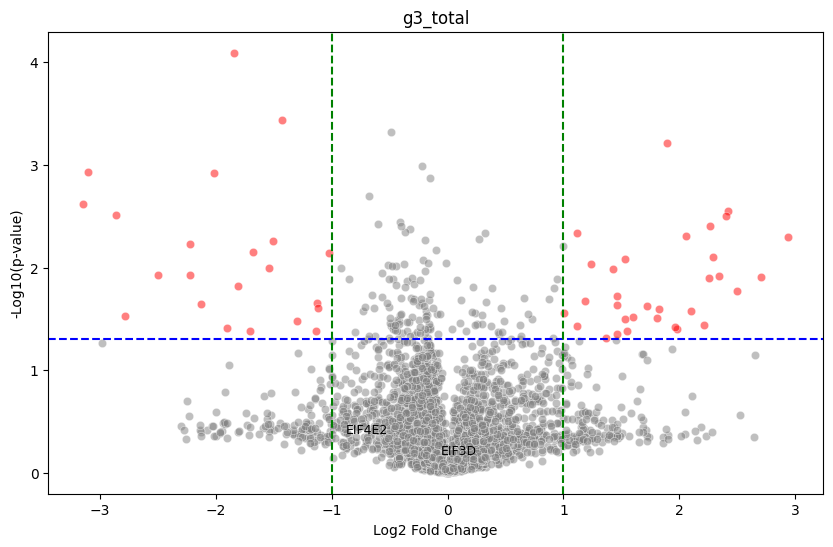

In [15]:
# generate plots 
result_interpret.loop_and_plot_results(path, results_paths, pois, uniprot=False) #uniprot=True